In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
np.warnings.filterwarnings('ignore')

In [68]:
df = pd.read_excel('sample_data_cohort_analysis.xlsx')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderId       2891 non-null   int64         
 1   OrderDate     2891 non-null   datetime64[ns]
 2   UserId        2891 non-null   int64         
 3   TotalCharges  2891 non-null   float64       
 4   CommonId      2891 non-null   object        
 5   PupId         2891 non-null   int64         
 6   PickupDate    2891 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 158.2+ KB


In [70]:
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09


In [71]:
df['CohortMonth'] = df.groupby('UserId')['OrderDate'].transform('min').dt.to_period('M')
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,CohortMonth
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12,2009-01
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20,2009-01
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04,2009-01
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09,2009-01
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09,2009-01


In [72]:
df['CurrentOrderMonth'] = df['OrderDate'].dt.to_period('M')
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,CohortMonth,CurrentOrderMonth
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04,2009-01,2009-02
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09,2009-01,2009-02
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09,2009-01,2009-02


In [82]:
df2 = df[df['CurrentOrderMonth'] < '2010-01']
df2.describe()

,OrderId,UserId,TotalCharges,PupId
count,1853.000000,1853.000000,1853.000000,1853.000000
mean,1233.210470,45169.944954,54.879384,5.780356
std,554.567196,52137.464999,49.483143,3.692091
min,256.000000,47.000000,1.390000,2.000000
25%,757.000000,4622.000000,21.340000,3.000000
50%,1230.000000,22722.000000,41.510000,5.000000
75%,1720.000000,75649.000000,72.410000,6.000000
max,2186.000000,221384.000000,527.159700,20.000000


In [73]:
df_cohort = df.groupby(['CohortMonth', 'CurrentOrderMonth'])['UserId'].nunique().reset_index().rename(columns={'UserId': 'n_users'})
df_cohort.head()

,CohortMonth,CurrentOrderMonth,n_users
0,2009-01,2009-01,22
1,2009-01,2009-02,8
2,2009-01,2009-03,10
3,2009-01,2009-04,9
4,2009-01,2009-05,10


In [74]:
import math

PeriodDistance = (df_cohort['CurrentOrderMonth'].dt.to_timestamp() - df_cohort['CohortMonth'].dt.to_timestamp()).dt.days
df_cohort['PeriodDistance'] = PeriodDistance.apply(lambda x: math.ceil(x/31))
df_cohort.head()

,CohortMonth,CurrentOrderMonth,n_users,PeriodDistance
0,2009-01,2009-01,22,0
1,2009-01,2009-02,8,1
2,2009-01,2009-03,10,2
3,2009-01,2009-04,9,3
4,2009-01,2009-05,10,4


In [75]:
df_cohort['n_users_init'] = df_cohort.groupby('CohortMonth')['n_users'].transform('max')
df_cohort['n_users_pct'] = round((df_cohort['n_users'] / df_cohort['n_users_init'] * 100), 1)
df_cohort.head()

,CohortMonth,CurrentOrderMonth,n_users,PeriodDistance,n_users_init,n_users_pct
0,2009-01,2009-01,22,0,22,100.0
1,2009-01,2009-02,8,1,22,36.4
2,2009-01,2009-03,10,2,22,45.5
3,2009-01,2009-04,9,3,22,40.9
4,2009-01,2009-05,10,4,22,45.5


In [76]:
df_cohort_new = df_cohort[(df_cohort['PeriodDistance'] < 12) & (df_cohort['CohortMonth'] < '2010-01')]

In [77]:
df_cohort_pivot = df_cohort_new.pivot_table(index='CohortMonth', columns='PeriodDistance', values='n_users')
df_cohort_pivot

PeriodDistance,0,1,2,3,4,5,6,7,8,9,10,11
CohortMonth,,,,,,,,,,,,
2009-01,22.0,8.0,10.0,9.0,10.0,8.0,8.0,7.0,7.0,7.0,7.0,8.0
2009-02,15.0,3.0,5.0,1.0,4.0,4.0,4.0,5.0,5.0,4.0,3.0,3.0
2009-03,13.0,4.0,5.0,4.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0,2.0
2009-04,39.0,13.0,10.0,13.0,6.0,7.0,4.0,6.0,2.0,4.0,3.0,2.0
2009-05,50.0,13.0,12.0,5.0,4.0,6.0,3.0,5.0,5.0,4.0,3.0,NaN
2009-06,32.0,15.0,9.0,6.0,7.0,5.0,3.0,3.0,10.0,3.0,NaN,NaN
2009-07,50.0,23.0,13.0,10.0,11.0,10.0,11.0,7.0,7.0,NaN,NaN,NaN
2009-08,31.0,11.0,9.0,7.0,6.0,8.0,4.0,4.0,NaN,NaN,NaN,NaN
2009-09,37.0,15.0,14.0,8.0,13.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN


In [78]:
df_cohort_pivot_new = df_cohort_pivot.divide(df_cohort_pivot[0], axis=0)

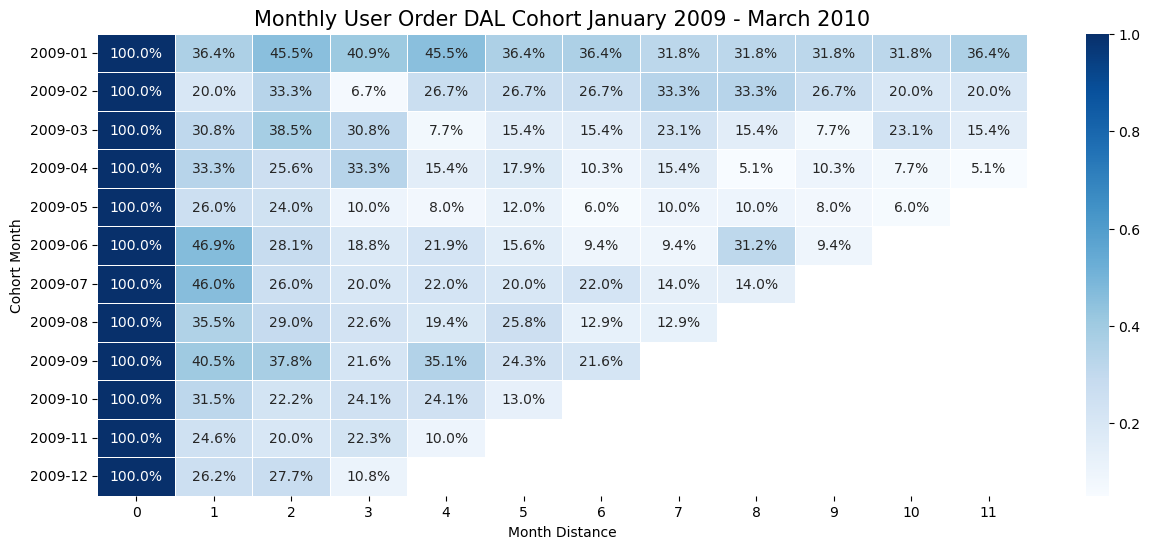

In [66]:
plt.figure(figsize=(15,6))
sns.heatmap(df_cohort_pivot_new, annot=True, fmt='.1%', cmap='Blues', linewidths=.5)
plt.title("Monthly User Order DAL Cohort January 2009 - March 2010", fontsize=15)
plt.xlabel('Month Distance')
plt.ylabel('Cohort Month');

- Misalkan Data yang digunakan ini adalah data delivery company DAL harian dari bulan Januari 2009 - Maret 2010
- Untuk melihat bagaimana Perilaku aktivitas konsumen dapat digunakan Cohort Analysis
- Berdasarkan dari Cohort Analysis, jelas terlihat bahwa jumlah User yang baru pertama kali melakukan transaksi dan menggunakan jasa delivery berbeda2. Dimana jumlah user baru terbanyak di bulan Februari 2010.
- Jika diperhatikan, bagaimana aktivitas pelanggan setiap bulannya, terlihat jelas bahwa aktivitas pelanggan sangat bervariasi.

,CohortMonth,CurrentOrderMonth,n_users,PeriodDistance,n_users_init,n_users_pct
0,2009-01,2009-01,22,0,22,100.0
1,2009-01,2009-02,8,1,22,36.4
2,2009-01,2009-03,10,2,22,45.5
3,2009-01,2009-04,9,3,22,40.9
4,2009-01,2009-05,10,4,22,45.5


In [44]:
df_cohort[df_cohort["PeriodDistance"]==1].sort_values("n_users_pct",ascending=False).iloc[:3]

,CohortMonth,CurrentOrderMonth,n_users,PeriodDistance,n_users_init,n_users_pct
114,2010-01,2010-02,50,1,95,52.6
65,2009-06,2009-07,15,1,32,46.9
75,2009-07,2009-08,23,1,50,46.0


In [46]:
top_3 = df_cohort[df_cohort["PeriodDistance"]==1].sort_values("n_users_pct",ascending=False).iloc[:3]
top_3_name = top_3["CohortMonth"].tolist()
top_3_value = [round(x,2) for x in top_3["n_users_pct"].tolist()]

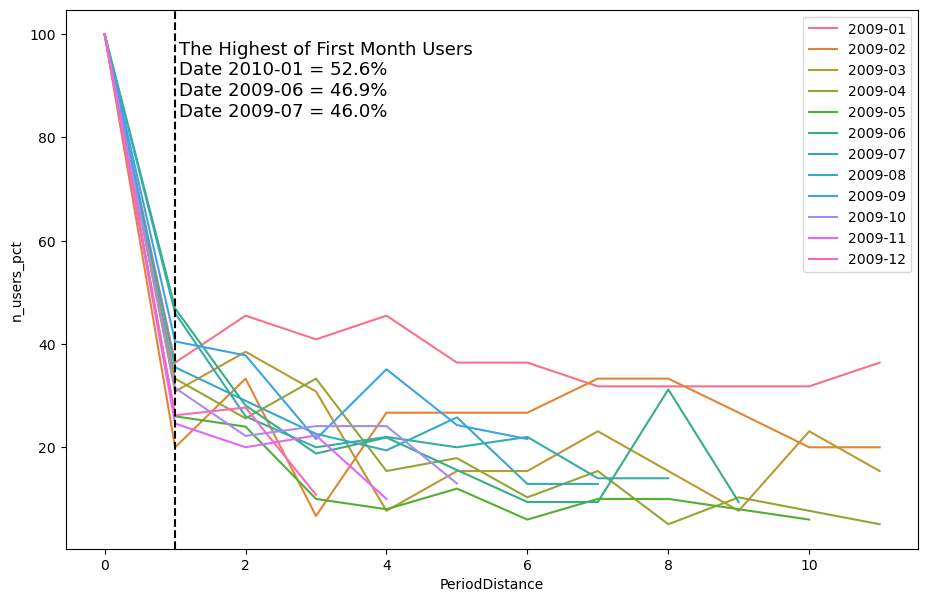

In [67]:
plt.style.use('default')
plt.figure(figsize=(11,7))
sns.lineplot(x=df_cohort_new['PeriodDistance'], y=df_cohort_new['n_users_pct'], hue=df_cohort_new['CohortMonth'])
plt.legend(loc= 'upper right')
text_plot = f"""
The Highest of First Month Users
Date {top_3_name[0]} = {top_3_value[0]}%
Date {top_3_name[1]} = {top_3_value[1]}%
Date {top_3_name[2]} = {top_3_value[2]}%
"""

plt.axvline(x=1, ls='--', color='black')
plt.text(1.05, 80, text_plot,fontsize=13)
plt.show();